In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
os.getcwd()

'/Users/nicolepretini/PycharmProjects/wheat-genomic-selection/notebooks'

In [3]:
# Load genotypes
X = pd.read_csv("../data/raw/genotypes.csv", index_col=0)

# Load phenotypes
pheno = pd.read_csv("../data/raw/phenotypes.csv")

X.shape, pheno.shape, pheno.columns.tolist()

((300, 39000), (300, 3), ['cultivar', 'trait_y', 'pop'])

In [4]:
pheno = pheno.set_index("cultivar")

# Align rows to ensure same cultivar order
pheno = pheno.loc[X.index]

y = pheno["trait_y"]
groups = pheno["pop"]

X.shape, y.shape, groups.nunique()

((300, 39000), (300,), 3)

In [5]:
print("Missing values in X:", int(X.isna().sum().sum()))
print("Missing values in y:", int(y.isna().sum()))

# Check genotype coding
pd.unique(X.stack().dropna())[:5]

Missing values in X: 233843
Missing values in y: 0


array([1., 0., 2.])

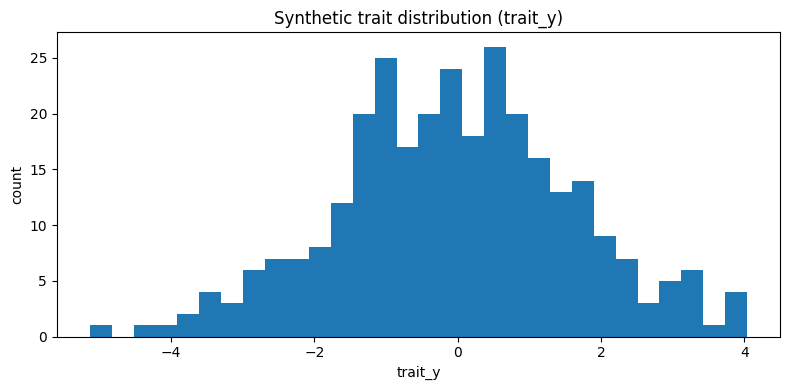

In [6]:
plt.figure(figsize=(8,4))
plt.hist(y, bins=30)
plt.title("Synthetic trait distribution (trait_y)")
plt.xlabel("trait_y")
plt.ylabel("count")
plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

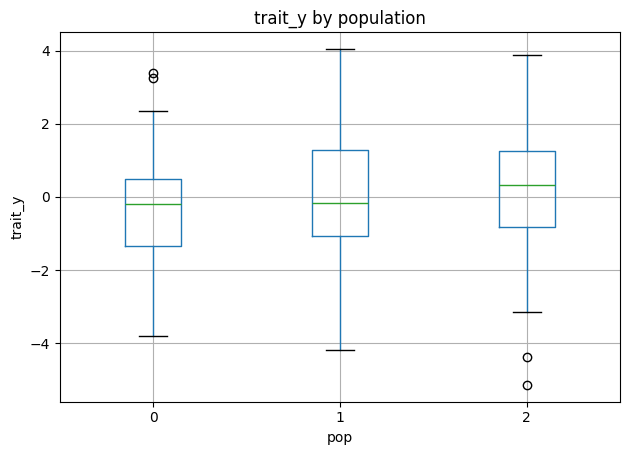

In [7]:
grp_stats = pheno.groupby("pop")["trait_y"].agg(
    ["count", "mean", "std", "min", "max"]
)
grp_stats

plt.figure(figsize=(8,4))
pheno.boxplot(column="trait_y", by="pop")
plt.title("trait_y by population")
plt.suptitle("")
plt.xlabel("pop")
plt.ylabel("trait_y")
plt.tight_layout()
plt.show()


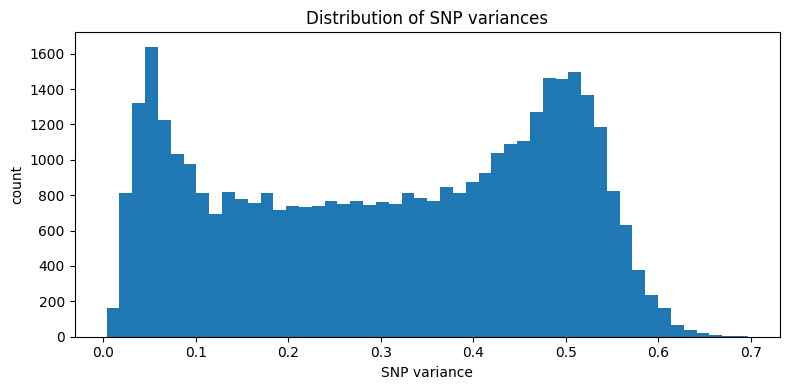

In [8]:
snp_variance = X.var(axis=0)

plt.figure(figsize=(8,4))
plt.hist(snp_variance, bins=50)
plt.xlabel("SNP variance")
plt.ylabel("count")
plt.title("Distribution of SNP variances")
plt.tight_layout()
plt.show()

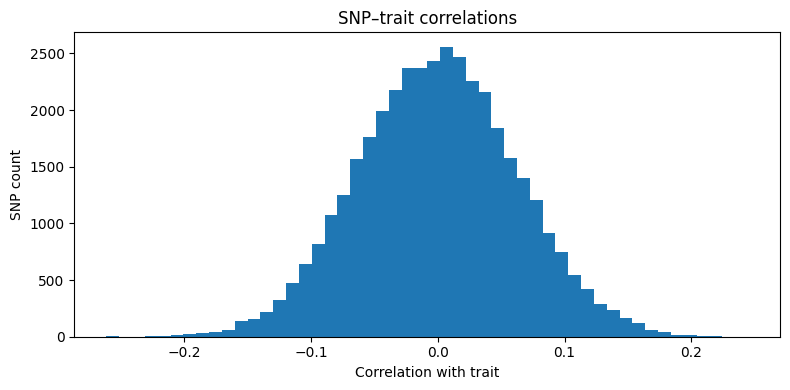

In [9]:
corrs = X.apply(lambda col: np.corrcoef(col.fillna(col.mean()), y)[0,1])
corrs = corrs.dropna()

plt.figure(figsize=(8,4))
plt.hist(corrs, bins=50)
plt.xlabel("Correlation with trait")
plt.ylabel("SNP count")
plt.title("SNP–trait correlations")
plt.tight_layout()
plt.show()

In [10]:
PROCESSED_DIR = Path("../data/processed")
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

pheno.reset_index().to_csv(
    PROCESSED_DIR / "phenotypes_clean.csv",
    index=False
)

print("Saved:", PROCESSED_DIR / "phenotypes_clean.csv")

Saved: ../data/processed/phenotypes_clean.csv


Day 1 conclusions

Phenotype shows realistic variance and population structure

Genotypes are correctly coded (0/1/2) with limited missingness

SNP effects are weak and distributed → polygenic architecture

Dataset is suitable for Genomic Selection modeling